In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
import pretrainedmodels
import cv2

from matplotlib import pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install pretrainedmodels

In [ ]:
class Image(object):
    def __init__(self, path):
        self.path = path

        self.rgb_image = None
        self.bgr_image = None
        self.gray_image = None

    def read_image(self, return_image = False):
        self.rgb_image = plt.imread(self.path)
        if return_image:
            return self.rgb_image

    def bgr(self, return_image = False):
        self.bgr_image = np.flip(plt.imread(self.path), 2)
        if return_image:
            return self.bgr_image

    def gray(self, return_image = False):
        self.gray_image = cv2.cvtColor(plt.imread(self.path), cv2.COLOR_RGB2GRAY)
        if return_image:
            return self.gray_imagezoom_img

    @staticmethod
    def show(img, title='image'):
        plt.imshow(img, cmap='gray')
        plt.show()

    @staticmethod
    def show_all(image_list, title_list=None):
        if title_list is None:
            title_list = ['' for i in range(len(image_list))]
        plt.figure(figsize=[20, 20])
        assert len(image_list) == len(title_list), "Incompatible lengthes of lists"
        N = len(image_list)
        for index, (img, title) in enumerate(zip(image_list, title_list)):
            plt.subplot(1, N, index+1)
            if len(img.shape) != 3:
                plt.imshow(img, cmap='gray')
            else:
                plt.imshow(img)
                plt.title(title)
        plt.show()

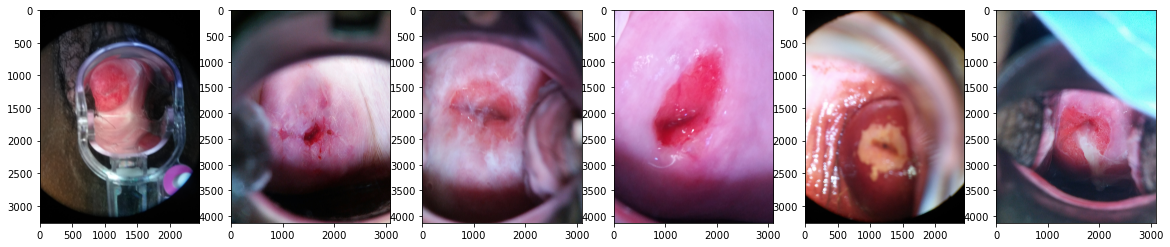

In [29]:
path = '/kaggle/input/intel-mobileodt-cervical-cancer-screening/train/train/Type_1/'
file_names = glob.glob(path + "*.jpg")
img_lst = []

for i in range(len(file_names)):
    img_lst.append(Image(file_names[i]).read_image(True))
    
    if i == 5:
        break

Image.show_all(img_lst)

In [ ]:
# At first, i'll introduce the definition of a residual network, as the bellow nets are types of ResNets:
    # ResNet is a neural network of a kind that builds on constructs known from pyramidal cells.
    # Residual neural networks do this by utilizing skip connections, or shortcuts to jump over some layers (usually jumps over two or three layers).
    # This process is done to avoid the problem of vanishing gradients by skipping weights which don't influence.
    
# ResNet50:
    # The “50” refers to the number of layers it has.
    # Due to its large amount of layers, it has relatively good predictions, and it uses the advantege of Resnet of avoiding vanishing gradients.
    # A disadvantage is that training this model takes a lot of time complexity, due to its 50 layers.
    
# ResNext50:
    # ResNext50 introduces a hyper-parameter called cardinality — the number of independent paths, 
    # to provide a new way of adjusting the model capacity.
    # Experiments show that accuracy can be gained more efficiently by increasing the cardinality than by going deeper or wider.
    # The authors state that compared to Inception, 
    # this novel architecture is easier to adapt to new datasets/tasks, as it has a simple paradigm and only one hyper-parameter to be adjusted, 
    # while Inception has many hyper-parameters (like the kernel size of the convolutional layer of each path) to tune.
    
# SeNet:
    # In SeNet, The loss function is given an input convolutional block and the current number of channels it has
    # It squeezes each channel to a single numeric value using average pooling
    # A fully connected layer followed by a ReLU function adds the necessary nonlinearity.
    # It’s output channel complexity is also reduced by a certain ratio.
    # A second fully connected layer followed by a Sigmoid activation gives each channel a smooth gating function.
    # At last, its weight of each feature map of the convolutional block based on the result of our side network.
    # These five steps add almost no additional computing cost (less than 1%) and can be added to any model.
    # The authors show that by adding SE-blocks to ResNet-50 you can expect almost the same accuracy as ResNet-101 delivers. This is impressive for a model requiring only half of the computational costs.
    
# VGG16:
    # Most unique thing about VGG16 is that instead of having a large number of hyper-parameter 
    # they focused on having convolution layers of 3x3 filter with a stride 1 and always used same padding and
    # maxpool layer of 2x2 filter of stride 2. It follows this arrangement of convolution and max pool layers
    # consistently throughout the whole architecture. In the end it has 2 FC(fully connected layers) followed by a softmax for output.
    # The 16 in VGG16 refers to it has 16 layers that have weights.
    # This network is a pretty large network and it has about 138 million (approx) parameters.